<a href="https://colab.research.google.com/github/LaPhanie/Estudo_Trilha_Testes_AB_Flai/blob/main/Aulas_4_Intro_Intervalos_de_Confian%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intervalos de Confiança**

Este notebook de estudo refere-se as aulas 4.1, 4.2 e 4.3 da Trilha de Aprofundamente "Testes AB", do curso Dominando Data Science da Flai.
https://www.flai.com.br/

# Exemplo 1 - População com Distribuição Normal com variância conhecida (Aula 4.1)

A experiência com trabalhadores de certa indústria indica que o tempo necessário para que um trabalhador, aleatoriamente selecionado, realize uma determinada tarefa é aproximadamente normal, com desvio-padrão de aproximadamente 12 min.

Uma amostra aleatória de 25 trabalhadores forneceu **$\overline{x} = 140 min$**.

Determine os limites de confiança de 99% para a média **$\mu$** da população de todos os trabalhos que fazem este determinado serviço.

## Solução:
Neste exemplo podemos assumir a distribuição da populção como normal.

Também conhecemos o desvio-padrão **$\sigma^2 \ = \ 12 \ min$**. 

Logo, a variância **$\sigma \ = \ \sqrt{12} \ min$**.

Se o limite de confiança é de 99%, **$\alpha = 1 - 0.99 \ = \ 0.01$**. Logo, 
**$z_\frac{\alpha}{2} = 0.005$**.

Para este caso, o intervalo de confiança é dado por:

$$
\left[\ \bar{x} - z_\frac{\alpha}{2} \frac{\sigma_0}{\sqrt{n}},\ \bar{x} + z_\frac{\alpha}{2} \frac{\sigma_0}{\sqrt{n}}    \right]
$$


In [1]:
# Importando Bibliotecas
import scipy.stats as ss
import numpy as np

In [ ]:
z_alpha_2 = ss.norm.ppf(0.995)
x_médio = 140
desvpad = 12
n = 25
# Calculando os Intervals de Confiança (IC)

IC_inf = x_médio - (z_alpha_2*desvpad/np.sqrt(n)).round(2)
IC_sup = x_médio + (z_alpha_2*desvpad/np.sqrt(n)).round(2)

print('O intervalo de confiança de 99% é dado por [{}, {}].'.format(IC_inf, IC_sup))

O intervalo de confiança de 99% é dado por [133.82, 146.18].


**Notas sobre o método ( ).ppf**

O método ppf (percent point function), calcula o percentil. Isto é, calcula a distribuição acumulada até um determinado ponto da curva de distribuição de probabilidade.

In [ ]:
# Entrada: quantil. Saída: Ponto no qual o percentil (quantil) é atingido.
ss.norm.ppf(0.5)
# 0.5 da distribuição acumalada completa-se em z = 0.

0.0

In [ ]:
# Encontra os pontos nos quais os percentis são iguais a 0.005 e 0.995
# 0.995 é o finzinho da cauda da distribuição de probabilidades

ss.norm.ppf([0.005, 1-0.005])

array([-2.5758293,  2.5758293])

In [ ]:
ss.norm.ppf(0.995)

2.5758293035489004

## Função: IC_Normal_SigmaConhecida()

Refatorando o código acima para torná-lo mais genérico.

In [ ]:
print(
'Olá, \nEste código calcucla o intervalo de confiança para a média de' 
'uma variável aleatória (VA) nos seguintes casos:'
'\n1. VA com distribuição normal e variância cohecida;'
'\n2. VA com distribuição não normal em amostras grandes (n >30).'
)

Olá, 
Este código calcucla o intervalo de confiança para a média deuma variável aleatória (VA) nos seguintes casos:
1. VA com distribuição normal e variância cohecida;
2. VA com distribuição não normal em amostras grandes (n >30).


In [ ]:
def IC_Normal_SigmaConhecida():

  print(
  'Olá, \nEste código calcucla o intervalo de confiança para a média de' 
  'uma variável aleatória (VA) \nnos seguintes casos:'
  '\n1. VA com distribuição normal e variância cohecida;'
  '\n2. VA com distribuição não normal em amostras grandes (n >30).'
  )
  print()

  grau_conf = float(input("Digite o grau de confiança desejado em porcentagem: "))
  x_médio = float(input('Digite a média da amostra: '))
  desvpad = float(input ('Digite o desvio-padrão populacional: '))
  n = float(input('Digite o tamanho da amostra: '))

  alpha_2 = 1 - (1 - (grau_conf/100))/2
  z_alpha_2 = ss.norm.ppf(alpha_2)

  IC_inf = (x_médio - (z_alpha_2*desvpad/np.sqrt(n))).round(2)
  IC_sup = (x_médio + (z_alpha_2*desvpad/np.sqrt(n))).round(2)

  print()
  print('O intervalo de confiança de {}% é dado por [{}, {}].'.format(grau_conf, IC_inf, IC_sup))
  
IC_Normal_SigmaConhecida()  

Olá, 
Este código calcucla o intervalo de confiança para a média deuma variável aleatória (VA) 
nos seguintes casos:
1. VA com distribuição normal e variância cohecida;
2. VA com distribuição não normal em amostras grandes (n >30).

Digite o grau de confiança desejado em porcentagem: 99
Digite a média da amostra: 140
Digite o desvio-padrão populacional: 12
Digite o tamanho da amostra: 25

O intervalo de confiança de 99.0% é dado por [133.82, 146.18].


## Exemplo 2 - População com Distribuição Normal e Variância NÃO conhecida (Aula 4.2)
Deseja-se estimar o lucro médio mensal de uma empresa. 
Observou-se uma amostar aleatória de 25 meses, cujos resultados foram:

*   lucro médio: 4.370,00;
*   desvio-padrão: 418,00.

Sabe-se que o lucro mensal comporta-se como uma distribuição normal.
Encontre o intervalo de confiança para o lucro médio real, com uma confiança de 90%.

### Solução:

A amostra possui tamanho $n \ = \ 25$, isto é, $<\ 30$, e não conhecemos a variância populacional, apenas a amostral. Portanto precisamos usar a distribuição T-Student.

$\bar{x} \ = \ 4370;$

$S \ = \ 418;$

$Confiança \ = \ 90%$

$\frac{\alpha}{2} = (1 - 0.9)/2 \ = 0.05$

Para este caso o Intervalo de Confiança é dado por:

$$
\left[\ \bar{x} - t_{n-1;\frac{\alpha}{2}} \frac{S}{\sqrt{n}},\ \bar{x} + t_{n-1;\frac{\alpha}{2}} \frac{S}{\sqrt{n}} \right]
$$


##Função: IC_Normal_SigmaDesconhecida()


In [ ]:
def IC_Normal_SigmaDesconhecida():

  print(
  'Olá, \nEste código calcula o intervalo de confiança para a média de' 
  'uma variável aleatória (VA) \nno seguinte caso:'
  '\nVA com distribuição normal e variância populacional não conhecida.'
  )
  print()

  grau_conf = float(input("Digite o grau de confiança desejado em porcentagem: "))
  x_médio = float(input('Digite a média da amostra: '))
  desvpad_am = float(input ('Digite o desvio-padrão amostral: '))
  n = float(input('Digite o tamanho da amostra: '))

  alpha_2 = 1 - (1 - (grau_conf/100))/2
  
  # Calcula o ponto em que a acumulada é igual a alpha_2

  # A PPF de T requer dois argumentos: o valor da acumulada,
  # e o número de graus de liberdade (df: degrees of freedom)
  t_alpha_2 = ss.t.ppf(alpha_2, df = n-1 )

  IC_inf = (x_médio - (t_alpha_2*desvpad_am/np.sqrt(n))).round(2)
  IC_sup = (x_médio + (t_alpha_2*desvpad_am/np.sqrt(n))).round(2)

  print()
  print('O intervalo de confiança de {}% é dado por [{}, {}].'.format(grau_conf, IC_inf, IC_sup))
  
IC_Normal_SigmaDesconhecida()  


Olá, 
Este código calcula o intervalo de confiança para a média deuma variável aleatória (VA) 
no seguinte caso:
VA com distribuição normal e variância populacional não conhecida.

Digite o grau de confiança desejado em porcentagem: 90
Digite a média da amostra: 4370
Digite o desvio-padrão amostral: 418
Digite o tamanho da amostra: 25

O intervalo de confiança de 90.0% é dado por [4226.97, 4513.03].


In [ ]:
IC_Normal_SigmaDesconhecida()

Olá, 
Este código calcula o intervalo de confiança para a média deuma variável aleatória (VA) 
no seguinte caso:
VA com distribuição normal e variância populacional não conhecida.

Digite o grau de confiança desejado em porcentagem: 99
Digite a média da amostra: 4370
Digite o desvio-padrão amostral: 418
Digite o tamanho da amostra: 25

O intervalo de confiança de 99.0% é dado por [4136.18, 4603.82].


## Exemplo 3 - Distribuição NÃO Normal, grandes amostras.

Um fabricante deseja saber a estimativa intervalar para o tempo de vida útil médio das lâmpadas que produz, com um grau de confiança de 95%.

Para obter esta estimativa, tomou uma amostra aleatória de 400 lâmpadas que fabrica, obtendo vida média de 1000 horas com desvio padrão de 200 horas.

### Solução:

Neste caso, não se conhecem a variância nem a distribuição populacional, porém a amostra é suficientemente grande, para que a distribuição das médias amostrais convirjam para a distribuição normal.

Logo, o I.C. para a **verdadeira** méida populacional $\mu$ é dado por:

$$
\left[\ \bar{x} - z_\frac{\alpha}{2} \frac{S}{\sqrt{n}},\ \bar{x} + z_\frac{\alpha}{2} \frac{S}{\sqrt{n}}    \right]
$$

Assim podemos usar a função **IC_Normal_SigmaConhecida()** para calcular o Intervalo de Confiança.

In [ ]:
IC_Normal_SigmaConhecida()

Olá, 
Este código calcucla o intervalo de confiança para a média deuma variável aleatória (VA) 
nos seguintes casos:
1. VA com distribuição normal e variância cohecida;
2. VA com distribuição não normal em amostras grandes (n >30).

Digite o grau de confiança desejado em porcentagem: 95
Digite a média da amostra: 1000
Digite o desvio-padrão populacional: 200
Digite o tamanho da amostra: 400

O intervalo de confiança de 95.0% é dado por [980.4, 1019.6].


Observamos que o IC ficou pequeno, isso ocorre por que o tamanho da amostra é grande.

Podemos utilizar a distribuição t-Student, e avaliar o quanto ela converge para a distribuição normal quando n é suficientemente grande.


In [ ]:
IC_Normal_SigmaDesconhecida()

Olá, 
Este código calcula o intervalo de confiança para a média deuma variável aleatória (VA) 
no seguinte caso:
VA com distribuição normal e variância populacional não conhecida.

Digite o grau de confiança desejado em porcentagem: 95
Digite a média da amostra: 1000
Digite o desvio-padrão amostral: 200
Digite o tamanho da amostra: 400

O intervalo de confiança de 95.0% é dado por [980.34, 1019.66].


Observamos que os valores de IC estão muitos próximos, diferindo apenas nas casas decimais.
IMPORTANTE: a distribuição t fornece valores mais exatos.

---

# Determinação de Tamanho Amostral

A determinação do tamanho de uma amostra é um tema complexo e repleto de nuances, consequentemente há métodos adequados a diferentes situações.

No momento vamos ater-nos ao seguinte caso:

>**Determinação do tamanho de amostra para estimar média populacional, supondo-se que:**
*   **será realizada amostragem aleatória simples e com reposição;**
*   **a população é suficientemente grande;**

Sabemos que o erro **$e$** de uma estimativa é a diferença entre o valor estimado e o real. Para o valor médio, tem-se que:

$$ e_{\bar{x}} \ = \ \bar{x} \ - \ \mu$$ 

Do intervalo de confiança $\left[\ \bar{x} - z_\frac{\alpha}{2} \frac{S}{\sqrt{n}},\ \bar{x} + z_\frac{\alpha}{2} \frac{S}{\sqrt{n}}\right]$, sabemos que:

$$e \ = \ z_\frac{\alpha}{2} \frac{S}{\sqrt{n}}$$

Logo:
$$z_\frac{\alpha}{2} \frac{S}{e} \ = \ \sqrt{n}$$

Portanto, para o erro máximo tolerado $e_{max}$, o tamanho da amostra $n$ é dado por :
$$
n = {\left(\frac{z_\frac{\alpha}{2} \sigma}{e_{max}}\right)}^2
$$

Repare que o erro máximo, o grau de confiança (necessário para o cálculo de $z$ e o desvio-padrão devem ser determinados pelo pesquisador.

Na maioria das situações, a variância populacional é desconhecida, e seu valor precisa ser estimado. Algumas formas de se realizar esta estimativa são:

*   através de estudos similares;
*   através de dados históricos;
*   realização de amostragem piloto.


In [2]:
def Tamanho_Amostra():

  print(
  'Olá, \nEste código calcula o tamanho de amostra, para qualquer que seja o'
  '\ntamanho da população.\n'
  'É necessário fornecer o erro máximo admíssivel, o grau de confiança, e um \n'
  'valor estimado para o desvio padrão. \n'
  'Na maioria dos casos, o desvio-padrão populacional é desconhecido e precisa'
  '\nser estimado com base em valores obtidos a partir de estudos similares,'
  '\ndados históricos, ou realização de amostragem piloto.'
  )
  print()
  
  #variáveis de entrada
  grau_conf = float(input("Digite o grau de confiança desejado em porcentagem: "))
  desvpad = float(input ('Digite o desvio-padrão amostral: '))
  e_max = (float(input('Digite a margem de erro em porcentagem: ')))/100

  #cálculos
  alpha_2 = 1 - (1 - (grau_conf/100))/2
  z_alpha_2 = ss.norm.ppf(alpha_2)
  
  n = (((z_alpha_2*desvpad)/e_max)**2).round(2)
  
  print('Nas condições apresentadas, o tamanho da amostra "n" é: ', round(n))
  
Tamanho_Amostra()

Olá, 
Este código calcula o tamanho de amostra, para qualquer que seja o
tamanho da população.
É necessário fornecer o erro máximo admíssivel, o grau de confiança, e um 
valor estimado para o desvio padrão. 
Na maioria dos casos, o desvio-padrão populacional é desconhecido e precisa
ser estimado com base em valores obtidos a partir de estudos similares,
dados históricos, ou realização de amostragem piloto.

Digite o grau de confiança desejado em porcentagem: 95
Digite o desvio-padrão amostral: 0.5
Digite a margem de erro em porcentagem: 3
Nas condições apresentadas, o tamanho da amostra "n" é:  1067


##Majorando o valor da variância

Peguemos o exemplo de uma pesquisa de intenção de votos. Podemos considerar que o evento de votar num determinado candidato é um evento de Bernoulli: Vota no candidato A, ou Não vota no candidato A (vota em outros candidatos).

Para um experimento do tipo Bernoulli, a variância em função da probabilidade é descrita pelo gráfico abaixo.

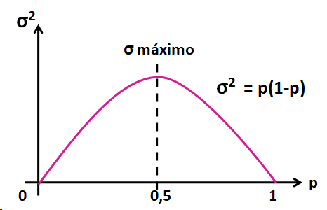

Observe que os menores valores de variância $(\sigma)^2$ ocorrem quando a probabilidade é muito baixa ou muito alta. 

Se $p = 1$, então 100% das pessoas votam em A, logo qualquer que seja minha amostra, ela sempre será composta por 100% de votantes em A. O raciocínio é o mesmo para $p = 0$.
Por outro lado, valores intermediários de $p$ representam uma mistura intermediária de votantes e não vontantes em A. Logo, as amostras retiradas apresentarão maior variabilidade, e a máxima variabilidade ocorre para $p = 0,5$. Desta forma podemos calcular o maior valor possível para a variância $(\sigma)^2$:
$$
(\sigma)^2 \ = \ p(1 \ - \ p)
$$

$$
para \ p \ = \ 0,5; \ (\sigma)^2 \ = \ 0,25
$$ 

Vamos calcular o tamanho amostral $n$ para $(\sigma)^2 \ = \ 0,25$:

In [6]:
Tamanho_Amostra()

Olá, 
Este código calcula o tamanho de amostra, para qualquer que seja o
tamanho da população.
É necessário fornecer o erro máximo admíssivel, o grau de confiança, e um 
valor estimado para o desvio padrão. 
Na maioria dos casos, o desvio-padrão populacional é desconhecido e precisa
ser estimado com base em valores obtidos a partir de estudos similares,
dados históricos, ou realização de amostragem piloto.

Digite o grau de confiança desejado em porcentagem: 95
Digite o desvio-padrão amostral: 0.5
Digite a margem de erro em porcentagem: 2
Nas condições apresentadas, o tamanho da amostra "n" é:  2401
